1. Estudiar los diferentes espacios de color que tiene OpenCV, utilizando imágenes de su proyecto.
2. Implementar, como una función para OpenCV, las conversiones entre los espacios de color siguientes:
  RGB a LUX y su inversa.
  RGB a OHTA y su inversa.
evaluarlas en su proyecto o en aplicaciones a detección de rostros y de segmentación de productos, respectivamente.

Listo


(<matplotlib.axes._subplots.AxesSubplot at 0x110f1d410>,
 <matplotlib.text.Text at 0x111102e50>)

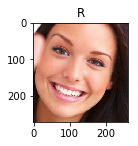

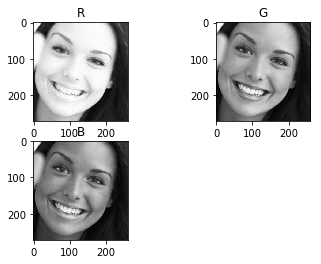

In [2]:
%matplotlib inline
import cv2
import time
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
from __future__ import division
from scipy.fftpack import fft, fftfreq

img = cv2.imread('Fig/face.png',1)
print "Listo"
imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(1)
plt.subplot(221), plt.imshow(imgrgb, cmap=plt.cm.gray), plt.title('R')

plt.figure(2)
plt.subplot(221), plt.imshow(imgrgb[:,:,0], cmap=plt.cm.gray), plt.title('R')
plt.subplot(222), plt.imshow(imgrgb[:,:,1], cmap=plt.cm.gray), plt.title('G')
plt.subplot(223), plt.imshow(imgrgb[:,:,2], cmap=plt.cm.gray), plt.title('B')

/Users/sergiodiazpinilla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in true_divide
/Users/sergiodiazpinilla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in true_divide


(<matplotlib.axes._subplots.AxesSubplot at 0x111fe9d10>,
 <matplotlib.text.Text at 0x1122074d0>)

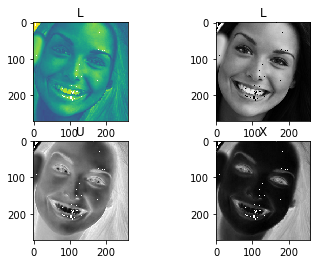

In [16]:
def RGBTLUX(img):
    red = img[:,:,0]
    green = img[:,:,1]
    blue = img[:,:,2]

    width, height = img.shape[:2]
    
    L = np.zeros((width,height),np.uint8)
    U = np.zeros((width,height),np.uint8)
    X = np.zeros((width,height),np.uint8)
    L = (((red+1)**0.3)*((green+1)**0.6)*((blue+1)**0.6))-1

    if((L>=red).all()):
        U = 128*((red+1)/(L+1))
    else:
        U = 256 - 128*((L+1)/(red+1))
    
    if((L>=blue).all()):
        X = 128*((blue+1)/(L+1))
    else:
        X= 256 - 128*((L+1)/(blue+1))
   
    return L ,U , X

L, U , X = RGBTLUX(imgrgb)
plt.figure(1)
plt.subplot(221), plt.imshow(L+U+X), plt.title('L')
plt.subplot(222), plt.imshow(L, cmap=plt.cm.gray), plt.title('L')
plt.subplot(223), plt.imshow(U, cmap=plt.cm.gray), plt.title('U')
plt.subplot(224), plt.imshow(X, cmap=plt.cm.gray), plt.title('X')

240 165 165 79.6666666667


(<matplotlib.axes._subplots.AxesSubplot at 0x114811c10>,
 <matplotlib.text.Text at 0x1148d4f50>)

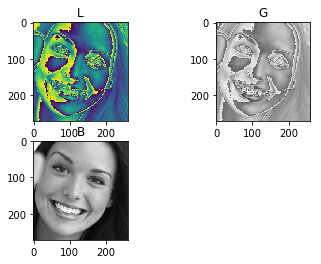

In [38]:
def RGBTOIII(img):
    red = img[:,:,0]
    green = img[:,:,1]
    blue = img[:,:,2]

    width, height = img.shape[:2]
    
    I1 = (1/3)*(red+green+blue)
    I2 = (1/2)*(red-blue)
    I3 = (1/4)*(2*green-red-blue)
    return I1,I2,I3

def IIITORGB(I1,I2,I3, img):
    width, height = img.shape[:2]

    R = I1+ I2 -(2/3)*I3
    G = I1 + (4/3)*I3
    B = I1 - I2 -(2/3)*I3
    red = img[:,:,0]
    green = img[:,:,1]
    blue = img[:,:,1]
    return G

I1,I2,I3 = RGBTOIII(imgrgb)

plt.figure(1)
plt.subplot(221), plt.imshow(I1), plt.title('L')
plt.subplot(222), plt.imshow(IIITORGB(I1,I2,I3,imgrgb),cmap=plt.cm.gray), plt.title('G')
plt.subplot(223), plt.imshow(imgrgb[:,:,1], cmap=plt.cm.gray), plt.title('B')